In [1]:
import os 
print(os.listdir("../data"))

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from matplotlib import pylab as plt
import matplotlib.dates as mdates
plt.rcParams['figure.figsize'] = (15.0, 8.0)
import seaborn as sns

['dimensi_barang_202112081905.csv', 'fakta_penjualan_barangg_202112081901.csv', 'fakta_penjualan_unv_202112091006.csv', 'items.csv', 'item_categories.csv', 'sales_train.csv', 'sample_submission.csv', 'shops.csv', 'test.csv']


In [2]:
df = pd.read_csv('../data/fakta_penjualan_unv_202112091006.csv')
df.head()

C:\Users\Diego\miniconda3\envs\ta\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (0,10,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,nonota,hari,bulan,tahun,namabarang,satuan,qty,hargajual,hargabeli,hargajual2,kodejenis,jenis,barcode,keuntungan,kodecabang,cabang
0,﻿021511000048,2,11,2015,LIFEBUOY SHP HAIRFALL 170ML,PCS,1.0,13450.0,12700.0,13450.0,10304,Hair Care (4),8999999033132,NaN,NaN,NaN
1,021511000048,2,11,2015,PEPSODENT PGB SUGAR ACID 180GR,PCS,1.0,12000.0,11550.0,12000.0,10307,Oral Care (7),8999999041953,NaN,NaN,NaN
2,021511000048,2,11,2015,LIFEBUOY TS MILD CARE 144*110G,PCS,5.0,3370.0,3225.0,3370.0,10301,Bath Care (1),8999999045944,NaN,NaN,NaN
3,021511000050,2,11,2015,CLOSE UP GREEN/MENTHOL 48*65GR,PCS,1.0,5450.0,5200.0,5450.0,10307,Oral Care (7),8999999707835,NaN,NaN,NaN
4,021511000057,2,11,2015,CITRA PEARLY UV SERUM 8*3*180M,PCS,1.0,22155.0,21300.0,22155.0,10308,Skin Care (8),8999999037918 - 26/06/2020,NaN,NaN,NaN


In [3]:
train_clean = df.drop(['nonota', 'namabarang', 'satuan', 'hargajual', 'hargabeli', 'hargajual2', 'kodejenis', 'jenis', 'keuntungan', 'kodecabang', 'cabang'], axis=1)

In [4]:
train_clean['barcode'] = train_clean['barcode'].astype(str).str[:13]

In [5]:
train_clean['qty'] = train_clean['qty'].astype(int)
train_clean['barcode'] = train_clean['barcode'].astype('int64')
display(train_clean.head())
display(train_clean.info())

,hari,bulan,tahun,qty,barcode
0,2,11,2015,1,8999999033132
1,2,11,2015,1,8999999041953
2,2,11,2015,5,8999999045944
3,2,11,2015,1,8999999707835
4,2,11,2015,1,8999999037918


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1844679 entries, 0 to 1844678
Data columns (total 5 columns):
 #   Column   Dtype
---  ------   -----
 0   hari     int64
 1   bulan    int64
 2   tahun    int64
 3   qty      int32
 4   barcode  int64
dtypes: int32(1), int64(4)
memory usage: 63.3 MB


None

In [6]:
years = [2017, 2018, 2019, 2020]
train_clean = train_clean[train_clean.tahun.isin(years)]

In [7]:
test = train_clean[train_clean['tahun']==2021]
test.head()

,hari,bulan,tahun,qty,barcode


In [8]:
def column_to_date(data):
    # create date column from hari, bulan, tahun column
    cols = ["hari","bulan","tahun"]
    data['date'] = data[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
    
    # drop hari, bulan, tahun column
    data = data.drop(['hari', 'bulan', 'tahun'], axis=1)
    
    # transformn date column to datetime
    data['date'] = pd.to_datetime(data['date'])
    
    return data

In [9]:
test = column_to_date(test)
test.head()

,qty,barcode,date


In [10]:
print(f"Min date from data set: {test['date'].min().date()}")
print(f"Max date from data set: {test['date'].max().date()}")

Min date from data set: NaT
Max date from data set: NaT


In [11]:
test = test.drop(['qty', 'date'], axis=1)
test.head()

,barcode


In [12]:
train_clean = column_to_date(train_clean)
train_clean.head()

,qty,barcode,date
412748,1,8999999041144,2017-01-01
412749,1,8999999003067,2017-01-01
412750,1,8999999033200,2017-01-01
412751,1,8999999406950,2017-01-01
412752,1,8999999006006,2017-01-01


In [13]:
train_clean['month_yr'] = train_clean['date'].apply(lambda x: x.strftime('%m-%y')).astype(str)

train_clean['month_yr'] = train_clean['month_yr'].map({'01-17':0,'02-17':1,'03-17':2,'04-17':3,'05-17':4,'06-17':5,'07-17':6,'08-17':7,'09-17':8,'10-17':9,'11-17':10,'12-17':11,
                                          '01-18':12,'02-18':13,'03-18':14,'04-18':15,'05-18':16,'06-18':17,'07-18':18,'08-18':19,'09-18':20,'10-18':21,'11-18':22,'12-18':23,
                                          '01-19':24,'02-19':25,'03-19':26,'04-19':27,'05-19':28,'06-19':29,'07-19':30,'08-19':31,'09-19':32,'10-19':33,'11-19':34,'12-19':35,
                                          '01-20':36,'02-20':37,'03-20':38,'04-20':39,'05-20':40,'06-20':41,'07-20':42,'08-20':43,'09-20':44,'10-20':45,'11-20':46,'12-20':47})

train_clean.head()

,qty,barcode,date,month_yr
412748,1,8999999041144,2017-01-01,0
412749,1,8999999003067,2017-01-01,0
412750,1,8999999033200,2017-01-01,0
412751,1,8999999406950,2017-01-01,0
412752,1,8999999006006,2017-01-01,0


In [14]:
train_clean = train_clean.drop(['date'], axis = 1)
train_clean.head()

,qty,barcode,month_yr
412748,1,8999999041144,0
412749,1,8999999003067,0
412750,1,8999999033200,0
412751,1,8999999406950,0
412752,1,8999999006006,0


In [15]:
# change the item count per day to item count per month by using group
train_clean = train_clean.groupby(["barcode", "month_yr"]).sum().reset_index()
train_clean = train_clean.rename(index=str, columns = {"qty":"qty_month"})
train_clean = train_clean[["barcode", "month_yr", "qty_month"]]
train_clean

,barcode,month_yr,qty_month
0,4800888137319,0,17
1,4800888137319,1,9
2,4800888137319,2,10
3,4800888137319,3,11
4,4800888137319,4,17
...,...,...,...
45863,9310158111567,19,4
45864,9310158111567,20,11
45865,9310158111567,21,9
45866,9310158111567,22,5


In [16]:
check = train_clean[["barcode","month_yr","qty_month"]]
check = check.loc[check['barcode'] == 4800888137319]
check

,barcode,month_yr,qty_month
0,4800888137319,0,17
1,4800888137319,1,9
2,4800888137319,2,10
3,4800888137319,3,11
4,4800888137319,4,17
5,4800888137319,5,8
6,4800888137319,6,16
7,4800888137319,7,10
8,4800888137319,8,14
9,4800888137319,9,11


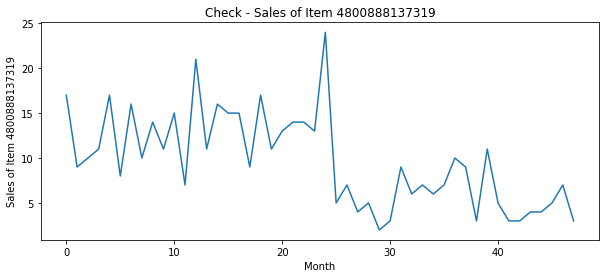

In [17]:
plt.figure(figsize=(10,4))
plt.title('Check - Sales of Item 4800888137319')
plt.xlabel('Month')
plt.ylabel('Sales of Item 4800888137319')
plt.plot(check["month_yr"],check["qty_month"]);

In [18]:
month_list=[i for i in range(47+1)]
barcode = []
for i in range(47+1):
    barcode.append(4800888137319)
months_full = pd.DataFrame({'barcode':barcode, 'month_yr':month_list})
months_full

,barcode,month_yr
0,4800888137319,0
1,4800888137319,1
2,4800888137319,2
3,4800888137319,3
4,4800888137319,4
5,4800888137319,5
6,4800888137319,6
7,4800888137319,7
8,4800888137319,8
9,4800888137319,9


In [19]:
sales_47month = pd.merge(check, months_full, how='right', on=['barcode','month_yr'])
sales_47month = sales_47month.sort_values(by=['month_yr'])
sales_47month.fillna(0.00,inplace=True)
sales_47month

,barcode,month_yr,qty_month
0,4800888137319,0,17
1,4800888137319,1,9
2,4800888137319,2,10
3,4800888137319,3,11
4,4800888137319,4,17
5,4800888137319,5,8
6,4800888137319,6,16
7,4800888137319,7,10
8,4800888137319,8,14
9,4800888137319,9,11


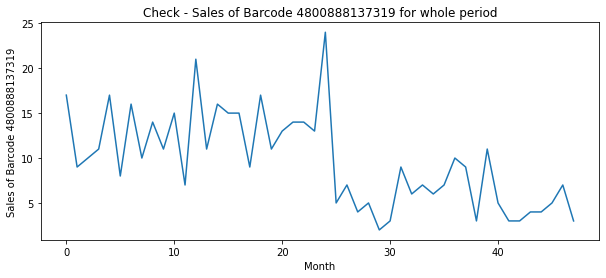

In [20]:
plt.figure(figsize=(10,4))
plt.title('Check - Sales of Barcode 4800888137319 for whole period')
plt.xlabel('Month')
plt.ylabel('Sales of Barcode 4800888137319')
plt.plot(sales_47month["month_yr"],sales_47month["qty_month"]);

In [21]:
for i in range(1,6):
    sales_47month["T_" + str(i)] = sales_47month.qty_month.shift(i)
sales_47month.fillna(0.0, inplace=True)
sales_47month

,barcode,month_yr,qty_month,T_1,T_2,T_3,T_4,T_5
0,4800888137319,0,17,0.0,0.0,0.0,0.0,0.0
1,4800888137319,1,9,17.0,0.0,0.0,0.0,0.0
2,4800888137319,2,10,9.0,17.0,0.0,0.0,0.0
3,4800888137319,3,11,10.0,9.0,17.0,0.0,0.0
4,4800888137319,4,17,11.0,10.0,9.0,17.0,0.0
5,4800888137319,5,8,17.0,11.0,10.0,9.0,17.0
6,4800888137319,6,16,8.0,17.0,11.0,10.0,9.0
7,4800888137319,7,10,16.0,8.0,17.0,11.0,10.0
8,4800888137319,8,14,10.0,16.0,8.0,17.0,11.0
9,4800888137319,9,11,14.0,10.0,16.0,8.0,17.0


In [22]:
data = sales_47month[['barcode','month_yr','T_1','T_2','T_3','T_4','T_5', 'qty_month']].reset_index()
data = data.drop(labels = ['index'], axis = 1)
data

,barcode,month_yr,T_1,T_2,T_3,T_4,T_5,qty_month
0,4800888137319,0,0.0,0.0,0.0,0.0,0.0,17
1,4800888137319,1,17.0,0.0,0.0,0.0,0.0,9
2,4800888137319,2,9.0,17.0,0.0,0.0,0.0,10
3,4800888137319,3,10.0,9.0,17.0,0.0,0.0,11
4,4800888137319,4,11.0,10.0,9.0,17.0,0.0,17
5,4800888137319,5,17.0,11.0,10.0,9.0,17.0,8
6,4800888137319,6,8.0,17.0,11.0,10.0,9.0,16
7,4800888137319,7,16.0,8.0,17.0,11.0,10.0,10
8,4800888137319,8,10.0,16.0,8.0,17.0,11.0,14
9,4800888137319,9,14.0,10.0,16.0,8.0,17.0,11


In [23]:
train_data = data[:-3]
val_data = data[-3:]
x_train, y_train = train_data.drop(["qty_month"], axis=1), train_data.qty_month
x_val, y_val = val_data.drop(["qty_month"], axis=1), val_data.qty_month

In [24]:
x_train

,barcode,month_yr,T_1,T_2,T_3,T_4,T_5
0,4800888137319,0,0.0,0.0,0.0,0.0,0.0
1,4800888137319,1,17.0,0.0,0.0,0.0,0.0
2,4800888137319,2,9.0,17.0,0.0,0.0,0.0
3,4800888137319,3,10.0,9.0,17.0,0.0,0.0
4,4800888137319,4,11.0,10.0,9.0,17.0,0.0
5,4800888137319,5,17.0,11.0,10.0,9.0,17.0
6,4800888137319,6,8.0,17.0,11.0,10.0,9.0
7,4800888137319,7,16.0,8.0,17.0,11.0,10.0
8,4800888137319,8,10.0,16.0,8.0,17.0,11.0
9,4800888137319,9,14.0,10.0,16.0,8.0,17.0


In [25]:
y_train

0     17
1      9
2     10
3     11
4     17
5      8
6     16
7     10
8     14
9     11
10    15
11     7
12    21
13    11
14    16
15    15
16    15
17     9
18    17
19    11
20    13
21    14
22    14
23    13
24    24
25     5
26     7
27     4
28     5
29     2
30     3
31     9
32     6
33     7
34     6
35     7
36    10
37     9
38     3
39    11
40     5
41     3
42     3
43     4
44     4
Name: qty_month, dtype: int32

In [26]:
x_val

,barcode,month_yr,T_1,T_2,T_3,T_4,T_5
45,4800888137319,45,4.0,4.0,3.0,3.0,5.0
46,4800888137319,46,5.0,4.0,4.0,3.0,3.0
47,4800888137319,47,7.0,5.0,4.0,4.0,3.0


In [27]:
y_val

45    5
46    7
47    3
Name: qty_month, dtype: int32

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [29]:
model_gru = Sequential()
model_gru.add(GRU(15, input_shape=(1,7)))
model_gru.add(Dense(1))
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [30]:
# Reshape the data between -1 and 1 and to 3D
scaler = StandardScaler()
scaler = MinMaxScaler(feature_range=(-1, 1))
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.fit_transform(x_val)

In [31]:
x_train_reshaped = x_train_scaled.reshape((x_train_scaled.shape[0], 1, x_train_scaled.shape[1]))
x_val_resaped = x_valid_scaled.reshape((x_valid_scaled.shape[0], 1, x_valid_scaled.shape[1]))

In [32]:
history = model_gru.fit(x_train_reshaped, y_train, validation_data=(x_val_resaped, y_val),epochs=70, batch_size=12, verbose=2, shuffle=False)
y_pre = model_gru.predict(x_val_resaped)

Epoch 1/70
4/4 - 9s - loss: 133.5151 - accuracy: 0.0000e+00 - val_loss: 29.1400 - val_accuracy: 0.0000e+00
Epoch 2/70
4/4 - 0s - loss: 132.7779 - accuracy: 0.0000e+00 - val_loss: 28.7756 - val_accuracy: 0.0000e+00
Epoch 3/70
4/4 - 0s - loss: 132.0827 - accuracy: 0.0000e+00 - val_loss: 28.4167 - val_accuracy: 0.0000e+00
Epoch 4/70
4/4 - 0s - loss: 131.4006 - accuracy: 0.0000e+00 - val_loss: 28.0628 - val_accuracy: 0.0000e+00
Epoch 5/70
4/4 - 0s - loss: 130.7281 - accuracy: 0.0000e+00 - val_loss: 27.7136 - val_accuracy: 0.0000e+00
Epoch 6/70
4/4 - 0s - loss: 130.0640 - accuracy: 0.0000e+00 - val_loss: 27.3688 - val_accuracy: 0.0000e+00
Epoch 7/70
4/4 - 0s - loss: 129.4073 - accuracy: 0.0000e+00 - val_loss: 27.0281 - val_accuracy: 0.0000e+00
Epoch 8/70
4/4 - 0s - loss: 128.7572 - accuracy: 0.0000e+00 - val_loss: 26.6911 - val_accuracy: 0.0000e+00
Epoch 9/70
4/4 - 0s - loss: 128.1130 - accuracy: 0.0000e+00 - val_loss: 26.3574 - val_accuracy: 0.0000e+00
Epoch 10/70
4/4 - 0s - loss: 127.4737

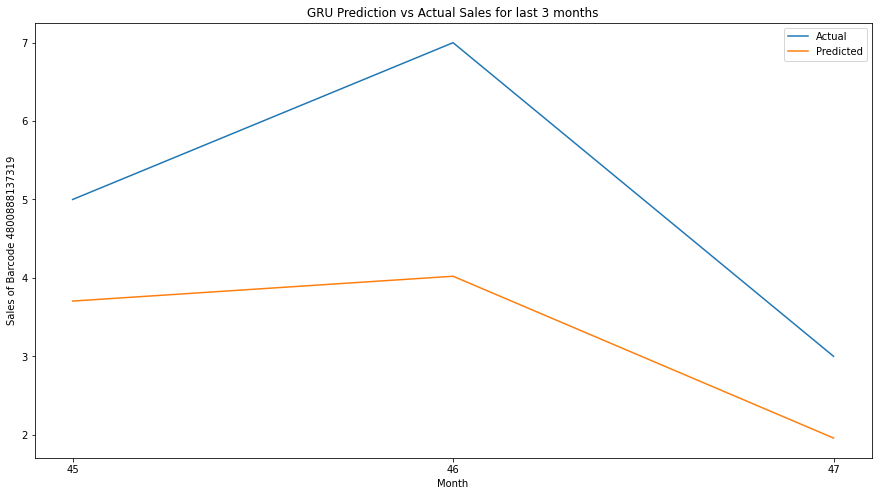

In [33]:
fig, ax = plt.subplots()
ax.plot(x_val['month_yr'], y_val, label='Actual')
ax.plot(x_val['month_yr'], y_pre, label='Predicted')
plt.title('GRU Prediction vs Actual Sales for last 3 months')
plt.xlabel('Month')
plt.xticks(x_val['month_yr'])
plt.ylabel('Sales of Barcode 4800888137319')
ax.legend()
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error
from numpy import sqrt

In [35]:
rmse = sqrt(mean_squared_error(y_val,y_pre))
print('Val RMSE: %.3f' % rmse)

Val RMSE: 1.970


In [36]:
y_pre

array([[3.704477 ],
       [4.0210376],
       [1.9575225]], dtype=float32)

rumus rmse

np.sqrt(((data_predict - labels) ** 2).mean())

ramal penjualan di bulan desember tahun 2015, 2016, 2017, 2018 untuk meramal bulan desember 2021